In [ ]:
# pip install numpy matplotlib

In [ ]:
# pip install torch==2.3.1 torchvision==0.18.1 torchaudio==2.3.1 --index-url https://download.pytorch.org/whl/cpu


# Lecture Notes: Building a Simple Neural Network with PyTorch

## Overview
In this lecture, we will go through the process of building a simple neural network using PyTorch. We'll cover the following topics:

1. **Data Generation**: Creating a synthetic dataset to train our neural network.
2. **Model Definition**: Defining a simple Multi-Layer Perceptron (MLP) with two fully connected layers.
3. **Training**: Using the Adam optimizer to train the model and minimize the loss.
4. **Visualization**: Creating 2D and 3D visualizations to interpret the model's performance and decision boundary.

## 1. Data Generation
We start by generating a synthetic dataset in polar coordinates and converting it to Cartesian coordinates. The dataset consists of two classes, which we'll use to train our neural network.

### Dataset Description:
- **Class 1**: Points generated from a circle with a radius centered around 8 units.
- **Class 2**: Points generated from a circle with a radius centered around 2 units.
  
### Mathematical Representation:
- **Polar Coordinates**:
  - For Class 1: $ r_1 = 8 + \epsilon $
  - For Class 2: $ r_2 = 2 + \epsilon $
  - $ \epsilon $ is a small random noise.
  
- **Conversion to Cartesian Coordinates**:
  - $ x_1 = r \cos(	heta) $
  - $ x_2 = r \sin(	heta) $



## 2. Model Definition
Next, we define a simple Multi-Layer Perceptron (MLP) using PyTorch. The model consists of two fully connected layers with a `tanh` activation function.

### Mathematical Representation:

- **Input Layer**:
  - Input: $ a_0 = x $ where $ x $ is the input feature vector.
  
- **First Layer (Hidden Layer)**:
  - Linear Transformation: $ z_0 = W_0 \cdot a_0 + b_0 $
  - Activation: $ a_1 = 	anh(z_0) $
  
- **Second Layer (Output Layer)**:
  - Linear Transformation: $ z_1 = W_1 \cdot a_1 + b_1 $
  - Activation (Output): $ y_p = tanh(z_1) $

Where:
- $ W_0 $ and $ b_0 $ are the weight matrix and bias vector for the first layer.
- $ W_1 $ and $ b_1 $ are the weight matrix and bias vector for the second layer.
- $ tanh $ is the hyperbolic tangent activation function.


## 3. Training the Model
We train the model using the Adam optimizer and Mean Squared Error (MSE) as the loss function. The model is trained for 5000 epochs to achieve a loss below 0.01.

### Loss Function:
- **Mean Squared Error (MSE)**:
  $
  L = \frac{1}{2} (y_p - y_t)^2
  $
  Where $ y_p $ is the predicted output, and $ y_t $ is the target output.

### Backpropagation:
- **Gradient Descent**: We update the weights using the gradients of the loss function with respect to the weights.
- **Weight Update**:
  $
  W \leftarrow W - \alpha \cdot \frac{\partial L}{\partial W}
  $
  Where $ \alpha $ is the learning rate.


### Step 1: Import Libraries

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


### Step 2: Generate the Dataset

We'll replicate the dataset generation process from the first notebook.

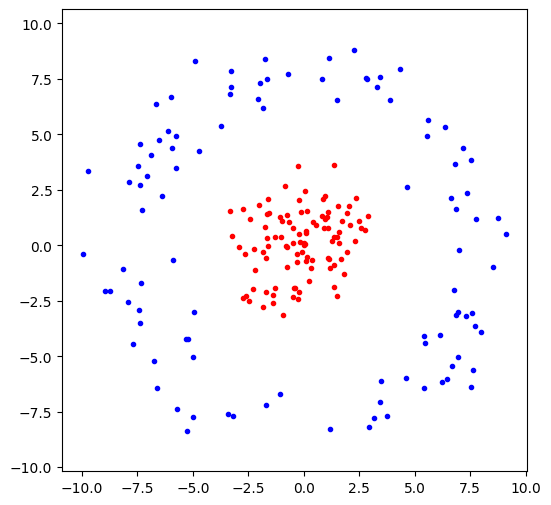

In [ ]:
# Generate synthetic data in polar coordinates
N = 200
n = N // 2

r1 = 8 + np.random.randn(n)
theta1 = np.random.rand(n) * 2.0 * np.pi

r2 = 2 + np.random.randn(n)
theta2 = np.random.rand(n) * 2.0 * np.pi

x1 = np.concatenate((r1 * np.cos(theta1), r2 * np.cos(theta2)))
x2 = np.concatenate((r1 * np.sin(theta1), r2 * np.sin(theta2)))

# Stack into a 2D array (N, 2)
x = np.stack((x1, x2), axis=1)

# Create labels (N, 1)
yt = np.ones((2 * n, 1))
yt[n:] = -1

# Convert to float32 for PyTorch compatibility
x = x.astype(np.float32)
yt = yt.astype(np.float32)

# Visualize the dataset
plt.figure(figsize=(6, 6))
plt.axis('equal')
plt.plot(x[:, 0][yt[:, 0] == 1], x[:, 1][yt[:, 0] == 1], '.b')
plt.plot(x[:, 0][yt[:, 0] == -1], x[:, 1][yt[:, 0] == -1], '.r')
plt.show()


### Step 3: Prepare Data for PyTorch

In [ ]:
# Convert numpy arrays to PyTorch tensors
x_tensor = torch.tensor(x)
yt_tensor = torch.tensor(yt)


### Step 4: Define the Model

In [ ]:
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(2, 3)  # First layer: input_dim=2, output_dim=3
        self.fc2 = nn.Linear(3, 1)  # Second layer: input_dim=3, output_dim=1
        self.activation = torch.tanh  # Activation function

    def forward(self, x):
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        x = self.activation(x)
        return x


### Step 5: Initialize the Model, Loss Function, and Optimizer

In [ ]:
model = SimpleMLP()
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent optimizer


### Step 6: Training Loop

In [ ]:
# Number of iterations (epochs)
epochs = 100

for epoch in range(epochs):
    # Forward pass: compute predicted y by passing x to the model
    y_pred = model(x_tensor)

    # Compute the loss
    loss = criterion(y_pred, yt_tensor)

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()  # Zero the gradients before backpropagation
    loss.backward()        # Backpropagation
    optimizer.step()       # Update the weights

    # Print the loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 1.2429
Epoch [20/100], Loss: 1.2238
Epoch [30/100], Loss: 1.2045
Epoch [40/100], Loss: 1.1851
Epoch [50/100], Loss: 1.1658
Epoch [60/100], Loss: 1.1468
Epoch [70/100], Loss: 1.1283
Epoch [80/100], Loss: 1.1105
Epoch [90/100], Loss: 1.0938
Epoch [100/100], Loss: 1.0780


### Step 7: Visualize the Decision Boundary
After training, you might want to visualize how well the model has learned to classify the data:

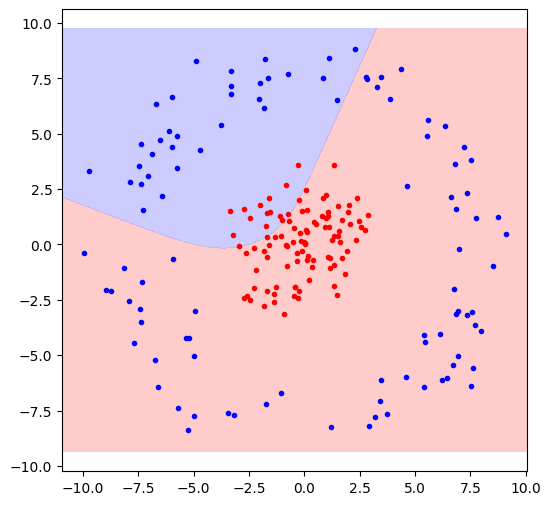

In [ ]:
# Generate a grid of points to classify
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
grid = np.c_[xx.ravel(), yy.ravel()]

# Convert the grid to a PyTorch tensor
grid_tensor = torch.tensor(grid, dtype=torch.float32)

# Make predictions
with torch.no_grad():
    z = model(grid_tensor)
    z = z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, z, levels=[-1, 0, 1], alpha=0.6, colors=['#FFAAAA', '#AAAAFF'])
plt.axis('equal')
plt.plot(x[:, 0][yt[:, 0] == 1], x[:, 1][yt[:, 0] == 1], '.b')
plt.plot(x[:, 0][yt[:, 0] == -1], x[:, 1][yt[:, 0] == -1], '.r')
plt.show()


Epoch [500/5000], Loss: 0.0260
Epoch [1000/5000], Loss: 0.0095
Epoch [1500/5000], Loss: 0.0051
Epoch [2000/5000], Loss: 0.0032
Epoch [2500/5000], Loss: 0.0010
Epoch [3000/5000], Loss: 0.0007
Epoch [3500/5000], Loss: 0.0005
Epoch [4000/5000], Loss: 0.0003
Epoch [4500/5000], Loss: 0.0002
Epoch [5000/5000], Loss: 0.0002


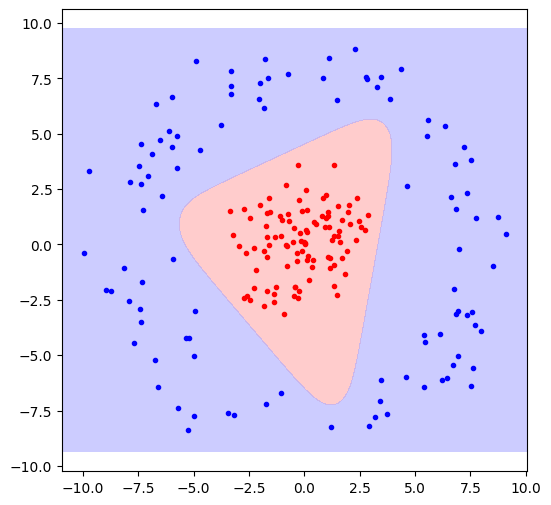

In [ ]:
# Initialize the model, loss function, and optimizer
model = SimpleMLP()
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam optimizer

# Number of iterations (epochs)
epochs = 5000

for epoch in range(epochs):
    # Forward pass: compute predicted y by passing x to the model
    y_pred = model(x_tensor)

    # Compute the loss
    loss = criterion(y_pred, yt_tensor)

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()  # Zero the gradients before backpropagation
    loss.backward()        # Backpropagation
    optimizer.step()       # Update the weights

    # Print the loss every 500 epochs
    if (epoch+1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Generate a grid of points to classify
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
grid = np.c_[xx.ravel(), yy.ravel()]

# Convert the grid to a PyTorch tensor
grid_tensor = torch.tensor(grid, dtype=torch.float32)

# Make predictions
with torch.no_grad():
    z = model(grid_tensor)
    z = z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, z, levels=[-1, 0, 1], alpha=0.6, colors=['#FFAAAA', '#AAAAFF'])
plt.axis('equal')
plt.plot(x[:, 0][yt[:, 0] == 1], x[:, 1][yt[:, 0] == 1], '.b')
plt.plot(x[:, 0][yt[:, 0] == -1], x[:, 1][yt[:, 0] == -1], '.r')
plt.show()


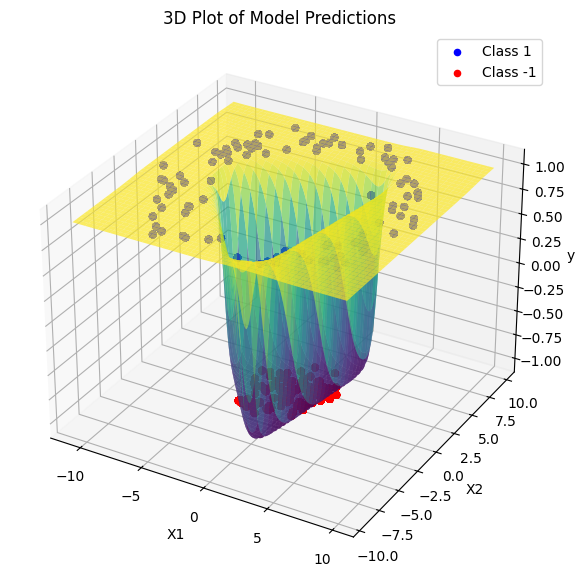

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Generate predictions for the 3D plot
with torch.no_grad():
    z = model(grid_tensor)
    z = z.reshape(xx.shape).numpy()

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(xx, yy, z, cmap='viridis', alpha=0.7)

# Plot the original data points on the surface
ax.scatter(x[:, 0][yt[:, 0] == 1], x[:, 1][yt[:, 0] == 1], yt[yt[:, 0] == 1], color='blue', label='Class 1')
ax.scatter(x[:, 0][yt[:, 0] == -1], x[:, 1][yt[:, 0] == -1], yt[yt[:, 0] == -1], color='red', label='Class -1')

# Labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('yp')
ax.set_title('3D Plot of Model Predictions')

plt.legend()
plt.show()



### Explanation:
1. Dataset Generation: The dataset is generated in a polar coordinate system and then converted to Cartesian coordinates. The data points are plotted to show two clusters, which are the two classes.

2. Model Definition: A simple MLP with two layers is defined. The first layer maps the 2D input to a 3D space, and the second layer reduces it to 1D.

3. Training: The model is trained using gradient descent for 100 epochs, and the loss is printed every 10 epochs.

4. Decision Boundary: After training, we generate a grid of points, pass them through the model, and plot the decision boundary to see how well the model has classified the data.

This tutorial combines the dataset generation from the original Jupyter notebook with a PyTorch implementation of a simple two-layer neural network. The visualization steps allow you to see how the model's decision boundary evolves as it learns from the data.